# LJ Tutorial 

The target trajectory files and the target rdfs in this example were generated with the code below (hidden, click to reveal):

In [1]:
# This cell takes 40 minutes. Don't uncomment and rerun it unless you have a good reason.
# trajectory{kT}.gsd files were created here

#import freud
#import gsd
#import gsd.hoomd
#import hoomd
#import hoomd.md
#import numpy as np
#import matplotlib.pyplot as plt


#kTs = [0.5, 1.5, 2.0]
#n = 12
#n_particles = n**3

#for i,kT in enumerate(kTs):
#    hoomd.context.initialize("")
#    system = hoomd.init.create_lattice(
#        unitcell = (hoomd.lattice.sc(a=1.58, type_name="A")), 
#        n = n,
#    )
#    
#    nl = hoomd.md.nlist.cell()
#    lj = hoomd.md.pair.lj(r_cut=2.5, nlist=nl)
#    lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0)
#    hoomd.md.integrate.mode_standard(dt=0.001)
#    _all = hoomd.group.all()
#    nvt = hoomd.md.integrate.nvt(group=_all, kT=kT, tau=1)
#    nvt.randomize_velocities(seed=23)
#    hoomd.analyze.log(a
#        filename=f'LJ_kT{kT}.log',
#        quantities=["time", "temperature", "potential_energy"],
#        period=100,
#        overwrite=True
#    )
#    hoomd.dump.gsd(f'trajectory{kT}.gsd', period=5e3, group=_all, overwrite=True)
#    hoomd.run(1e6)

# Check that the system is equilibrated.

#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#fig.suptitle("Potential Energy vs Timestep")
#for i, kT in enumerate(kTs):   
#    log = np.loadtxt(f'state{i}/LJ_kT{kT}.log', skiprows=1)
#    ax1.plot(log[:,0],log[:,3], label=f"kT={kT}")
#    ax2.plot(log[-50:,0],log[-50:,3], label=f"kT={kT}")
#    ax1.set_xlabel("Timestep")
#    ax2.set_xlabel("Timestep")
#    ax1.set_ylabel("Potential Energy (AU)")
#    ax1.legend()
#    ax2.legend()

#for i,kT in enumerate(kTs):
#    gsdfile = f'trajectory{kT}.gsd'
#    with gsd.hoomd.open(gsdfile) as t:
#        rdf = freud.density.RDF(bins=101, r_max=5)
#        for snap in t[-50:]:
#            rdf.compute(system=snap, reset=False)
#        data = np.stack((rdf.bin_centers, rdf.rdf)).T
#        np.savetxt(f"rdfs/rdftarget{kT}", data)
#        plt.plot(rdf.bin_centers, rdf.rdf)
#        plt.title(f"State {i} kT = {kT}")
#        plt.xlabel("r")
#        plt.ylabel("g(r)")
#        plt.show()

In [2]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

from msibi import MSIBI, State, Pair, mie

Remove any previous runs.

In [3]:
%%bash
rm -rf state* potentials

Initialize the states.

In [4]:
kTs = [0.5, 1.5, 2.0]

## Create MSIBI instance

Pass in values that will be used.

In [5]:
opt = MSIBI(
    rdf_cutoff=5.0,
    n_rdf_points=101,
    max_frames=10,
    pot_cutoff=5.0,
    smooth_rdfs=True,
    verbose=True
)

## Specify states

Each state should have it's own corresponding trajectory (gsd) file. Create a state by passing in a name, trajectory file, and alpha value. The `MSIBI` instance created earlier needs to be passed in as well

In [6]:
opt.add_state(
    State(name="A", kT=0.5, traj_file="trajectory0.5.gsd", alpha=0.25)
)
opt.add_state(
    State(name="B", kT=1.5, traj_file="trajectory1.5.gsd", alpha=0.50)
)
opt.add_state(
    State(name="C", kT=2.0, traj_file="trajectory2.0.gsd", alpha=0.25)
)

## Specify pairs

Each type of possible pair-wise interaction of the system should have its own `Pair` created. Each `Pair` object needs to have the states created above added.

In [7]:
initial_guess = mie(opt.pot_r, 1.0, 1.0)
opt.add_pair(Pair(type1="A", type2="A", potential=initial_guess))

/Users/jenny/Projects/msibi/msibi/potentials.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return prefactor * eps * ((sig / r) ** m - (sig / r) ** n)
/Users/jenny/Projects/msibi/msibi/potentials.py:13: RuntimeWarning: invalid value encountered in subtract
  return prefactor * eps * ((sig / r) ** m - (sig / r) ** n)


## Implement MSIBI algorithm

Run the optimization steps. Pass in lists of any state and pair objects created above. 

Using HOOMD version 2.
-------- Iteration 0 --------
Launching 4 CPU threads...
Running state A on CPU
Running state C on CPU
Running state B on CPU


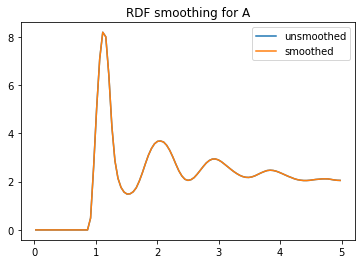

pair A-A, state A, iteration 0: 0.976566


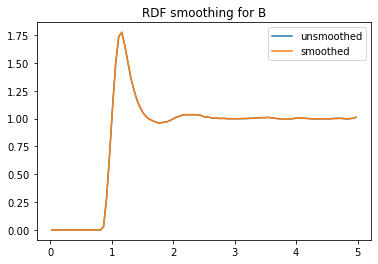

pair A-A, state B, iteration 0: 0.991563


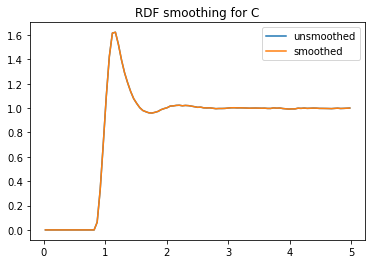

pair A-A, state C, iteration 0: 0.992036


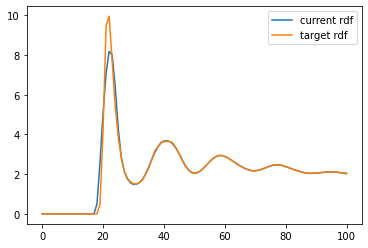

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


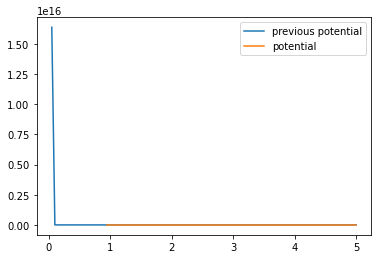

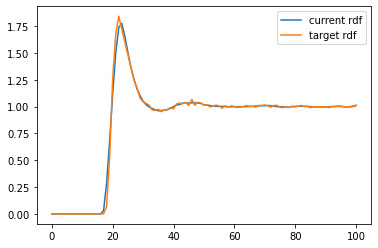

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


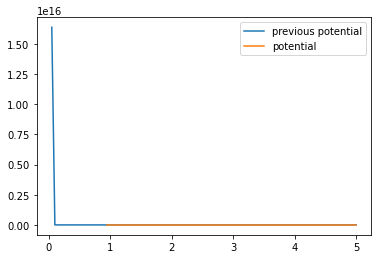

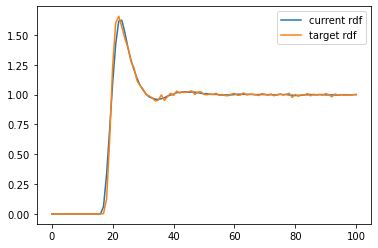

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


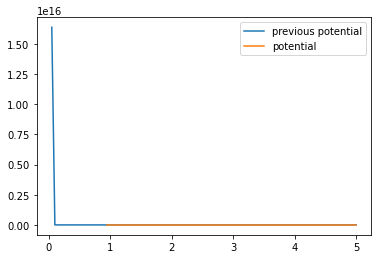

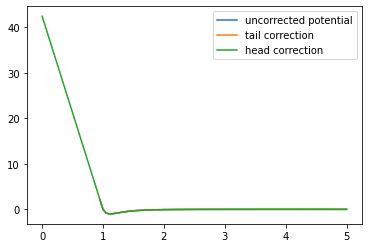

-------- Iteration 1 --------
Launching 4 CPU threads...
Running state A on CPU
Running state C on CPU
Running state B on CPU


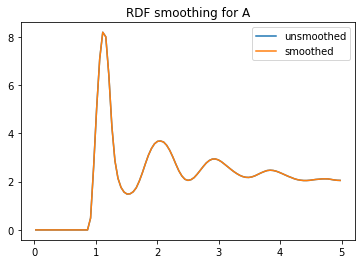

pair A-A, state A, iteration 1: 0.976566


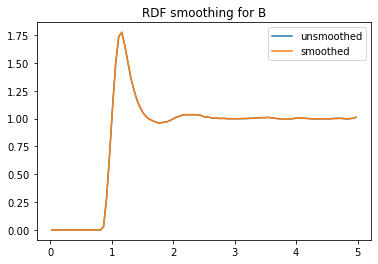

pair A-A, state B, iteration 1: 0.991563


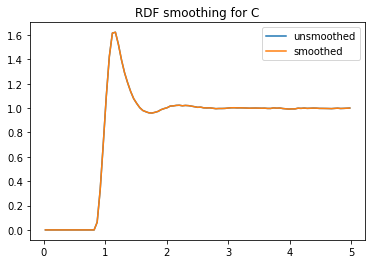

pair A-A, state C, iteration 1: 0.992036


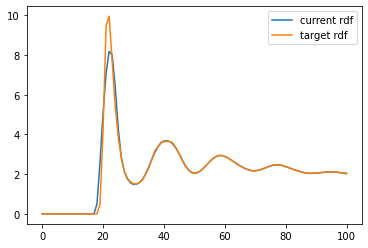

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


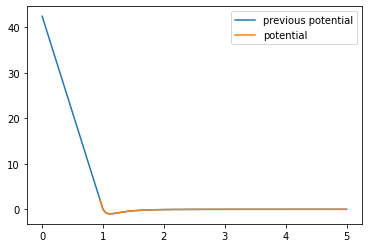

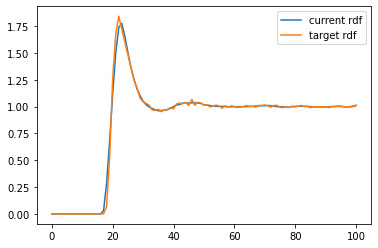

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


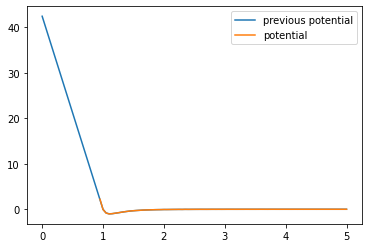

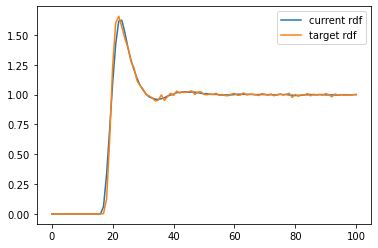

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


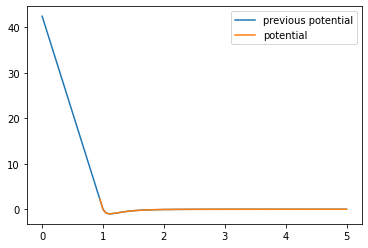

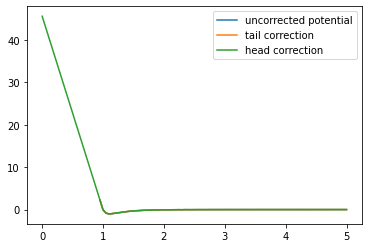

-------- Iteration 2 --------
Launching 4 CPU threads...
Running state B on CPU
Running state C on CPURunning state A on CPU



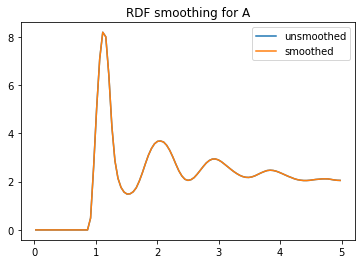

pair A-A, state A, iteration 2: 0.976566


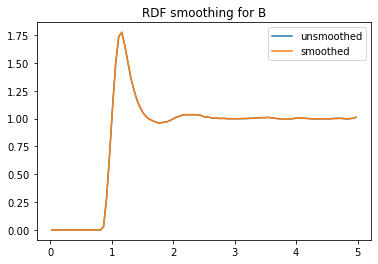

pair A-A, state B, iteration 2: 0.991563


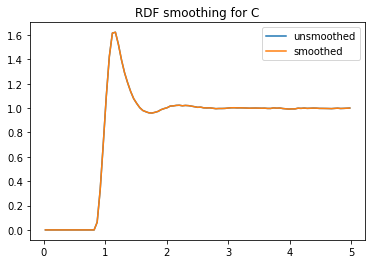

pair A-A, state C, iteration 2: 0.992036


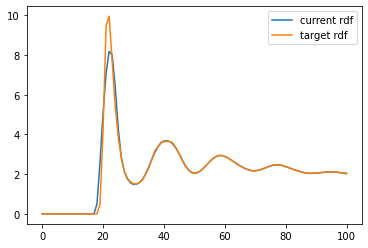

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


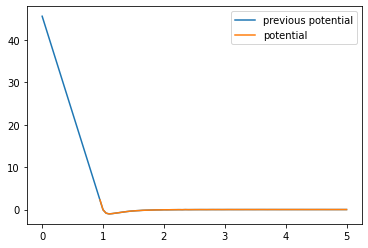

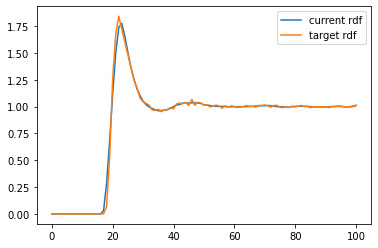

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


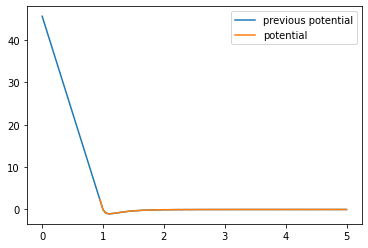

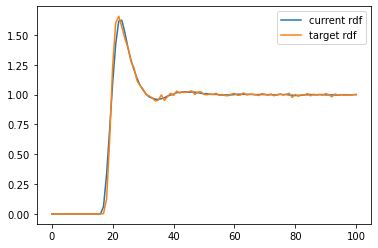

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


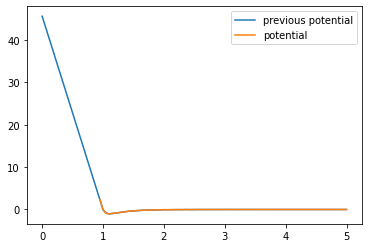

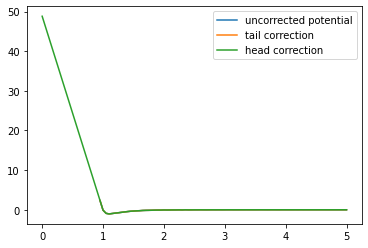

-------- Iteration 3 --------
Launching 4 CPU threads...
Running state A on CPURunning state B on CPURunning state C on CPU




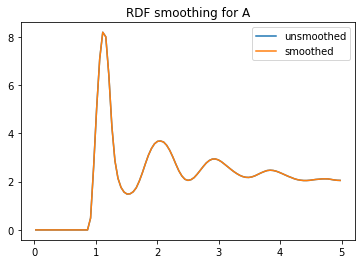

pair A-A, state A, iteration 3: 0.976566


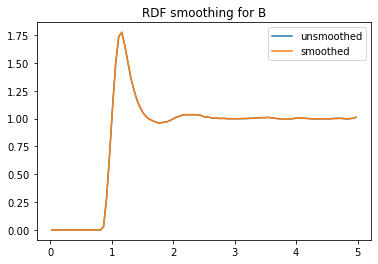

pair A-A, state B, iteration 3: 0.991563


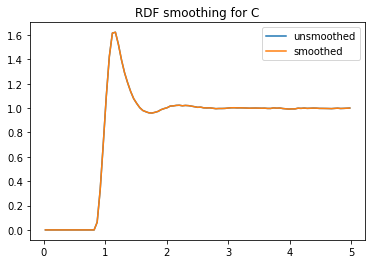

pair A-A, state C, iteration 3: 0.992036


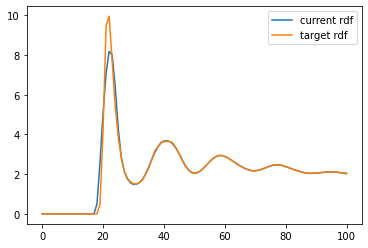

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


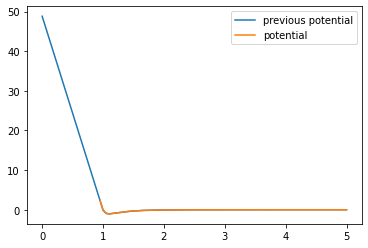

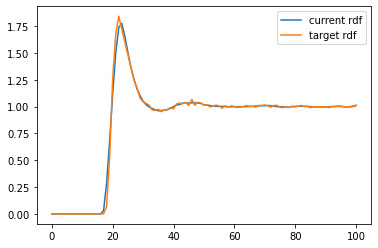

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


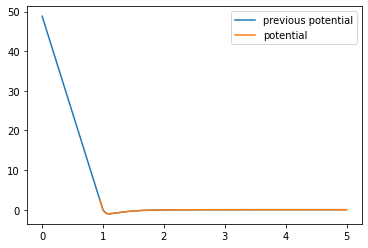

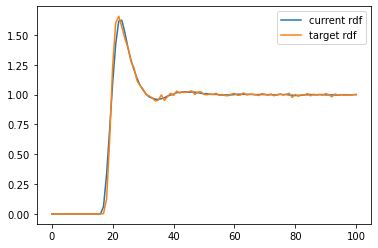

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


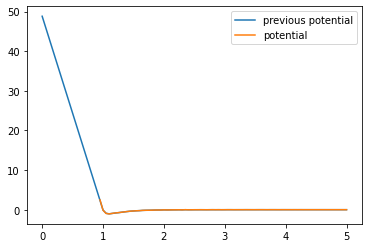

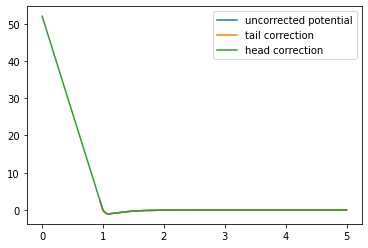

-------- Iteration 4 --------
Launching 4 CPU threads...
Running state B on CPURunning state A on CPU

Running state C on CPU


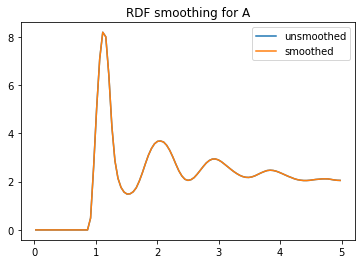

pair A-A, state A, iteration 4: 0.976566


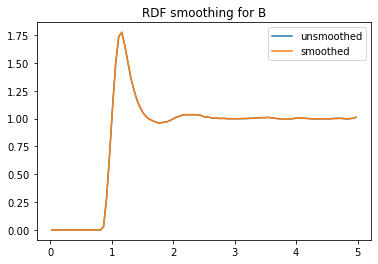

pair A-A, state B, iteration 4: 0.991563


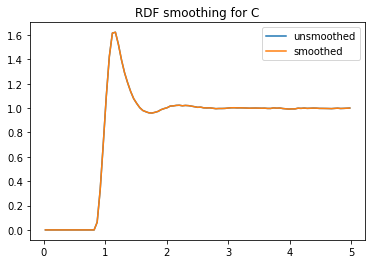

pair A-A, state C, iteration 4: 0.992036


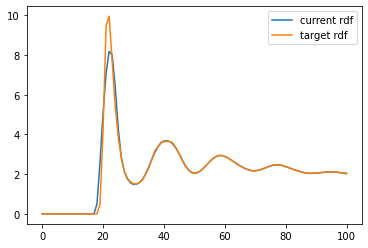

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: divide by zero encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


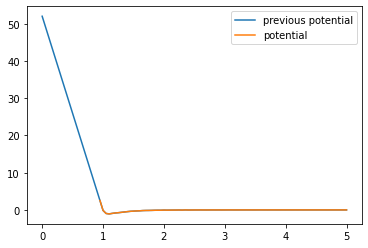

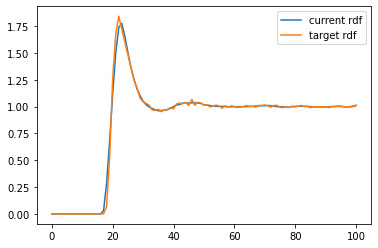

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


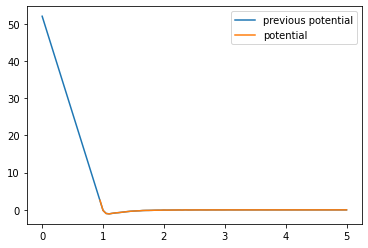

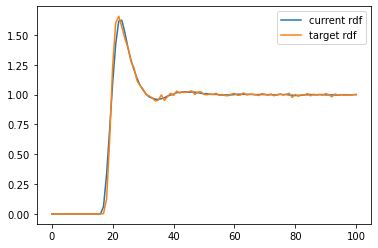

/Users/jenny/Projects/msibi/msibi/pair.py:191: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf / target_rdf) / len(self._states)


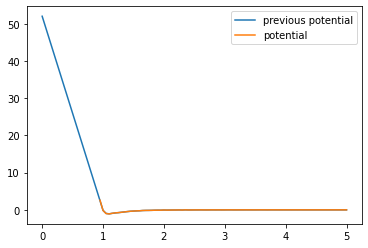

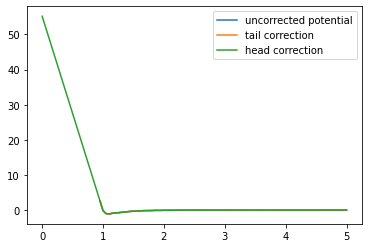

In [8]:
opt.optimize(n_iterations=5, engine='hoomd')

## Plot results

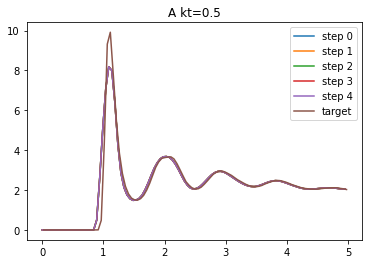

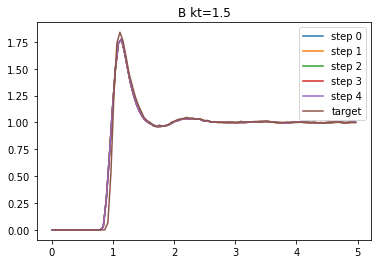

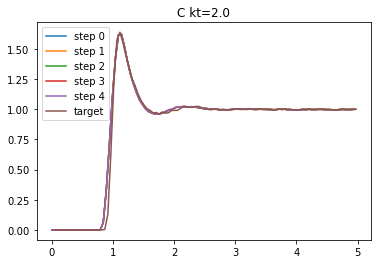

In [9]:
for state in opt.states:
    plt.title(f'{state.name} kt={state.kT}')
    for step in range(0, opt.n_iterations):
        step_rdf = np.loadtxt(f'{state.dir}/pair_A-A-state_{state.name}-step{step}.txt')
        plt.plot(step_rdf[:,0],step_rdf[:,1], label=f'step {step}')
      
    target = np.loadtxt(f"rdfs/rdftarget{state.kT}")
    plt.plot(target[:,0], target[:,1], label='target')
    plt.legend()
    plt.show()

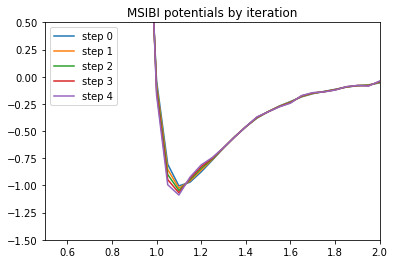

In [10]:
for step in range(0, opt.n_iterations):
    plt.ylim([-1.5,0.5])
    plt.xlim([0.5,2])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.A-A.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.legend()
plt.show()